In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
# import plotly.express as px
#import theme

%matplotlib inline

<based on this notebook "https://notebooks.ai/rmotr-curriculum/covid-19-40c03c06/Part+2.ipynb">_

## Load data

In [5]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)

COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

## Clean data

pivot table

In [6]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                               id_vars=covid_deaths.iloc[:, :4],
                               var_name='date',
                               value_name='deaths')

covid_recovered_long = pd.melt(covid_recovered,
                               id_vars=covid_recovered.iloc[:, :4],
                               var_name='date',
                               value_name='recovered')

merge tables

In [7]:
covid_df = covid_confirmed_long
covid_df['deaths'] = covid_deaths_long['deaths']
covid_df['recovered'] = covid_recovered_long['recovered']

data augmentation

In [8]:
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']


In [245]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,active
0,,Thailand,15.0000,101.0000,1/22/20,2,0,0,2
1,,Japan,36.0000,138.0000,1/22/20,2,0,0,2
2,,Singapore,1.2833,103.8333,1/22/20,0,0,0,0
3,,Nepal,28.1667,84.2500,1/22/20,0,0,0,0
4,,Malaysia,2.5000,112.5000,1/22/20,0,0,0,0


In [10]:
covid_df['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_df[['Province/State']] = covid_df[['Province/State']].fillna('')
covid_df.fillna(0, inplace=True)


save data

In [11]:
covid_df.to_csv('covid_df.csv', index=None)

In [12]:
# check file is OK
# pd.read_csv('covid_df.csv')

aggregate the data by Country/Region

In [13]:
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

In [14]:
covid_countries_df

,Country/Region,Province/State,Lat,Long,date,confirmed,deaths,recovered,active
0,Afghanistan,,33.0000,65.0000,3/9/20,22,0,1,21
1,Albania,,41.1533,20.1683,3/9/20,59,2,0,57
2,Algeria,,28.0339,1.6596,3/9/20,74,7,12,55
3,Andorra,,42.5063,1.5218,3/9/20,39,0,1,38
4,Antigua and Barbuda,,17.0608,-61.7964,3/9/20,1,0,0,1
...,...,...,...,...,...,...,...,...,...
457,Uruguay,,-32.5228,-55.7658,3/9/20,50,0,0,50
458,Uzbekistan,,41.3775,64.5853,3/9/20,15,0,0,15
459,Venezuela,,6.4238,-66.5897,3/9/20,36,0,0,36
460,Vietnam,,16.0000,108.0000,3/9/20,75,0,16,59


In [15]:
covid_countries_df = covid_countries_df.groupby('Country/Region').sum().reset_index()

In [16]:
# remove unused Lon and Lat
covid_countries_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [17]:
covid_countries_df

,Country/Region,confirmed,deaths,recovered,active
0,Afghanistan,22,0,1,21
1,Albania,59,2,0,57
2,Algeria,74,7,12,55
3,Andorra,39,0,1,38
4,Antigua and Barbuda,1,0,0,1
...,...,...,...,...,...
147,Uruguay,50,0,0,50
148,Uzbekistan,15,0,0,15
149,Venezuela,36,0,0,36
150,Vietnam,75,0,16,59


In [18]:
top_10_confirmed = covid_countries_df.sort_values(by='confirmed', ascending=False).head(10)

top_10_confirmed

,Country/Region,confirmed,deaths,recovered,active
28,China,81103,3241,69755,59979
70,Italy,35713,2978,4025,28710
66,Iran,17361,1135,5389,10837
129,Spain,13910,623,1081,12206
53,Germany,12327,28,105,12194
49,France,9105,148,12,8945
76,"Korea, South",8413,84,1540,7577
143,US,8363,140,24,8218
134,Switzerland,3028,28,15,2985
146,United Kingdom,2642,72,67,2504


### explore data per country

In [19]:
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()


In [20]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']

In [21]:
covid_arg.head()

,Country/Region,date,Lat,Long,confirmed,deaths,recovered,active
60,Argentina,1/22/20,-38.4161,-63.6167,0,0,0,0
212,Argentina,1/23/20,-38.4161,-63.6167,0,0,0,0
364,Argentina,1/24/20,-38.4161,-63.6167,0,0,0,0
516,Argentina,1/25/20,-38.4161,-63.6167,0,0,0,0
668,Argentina,1/26/20,-38.4161,-63.6167,0,0,0,0


Plot: evolucion en argentina

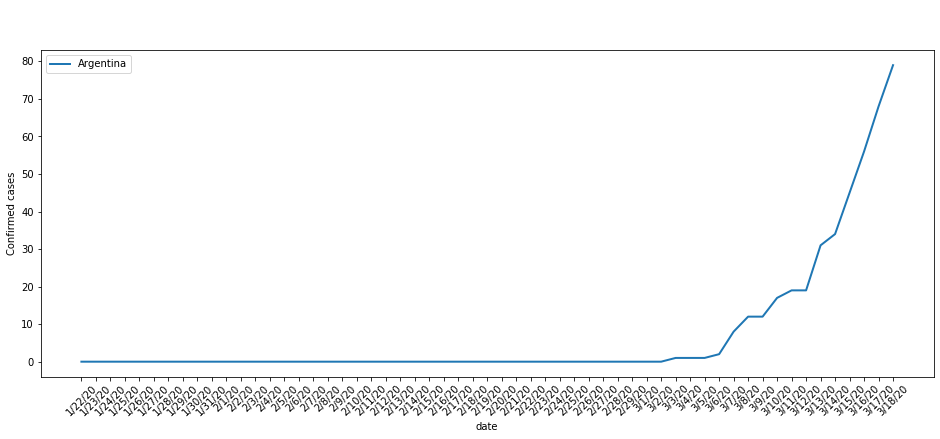

In [22]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)
plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina', 'World except China'])

plt.show()

Plot: evolucion en Argentina en escala logaritmica

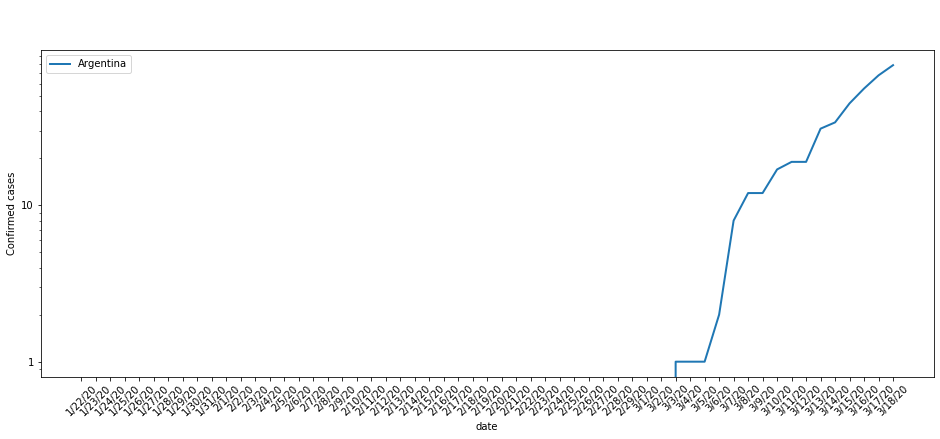

In [23]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina'])

plt.show()

## Comparemos con otros paises

In [32]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']
covid_chile = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Chile']
covid_esp = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Spain']
covid_ita = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Italy']


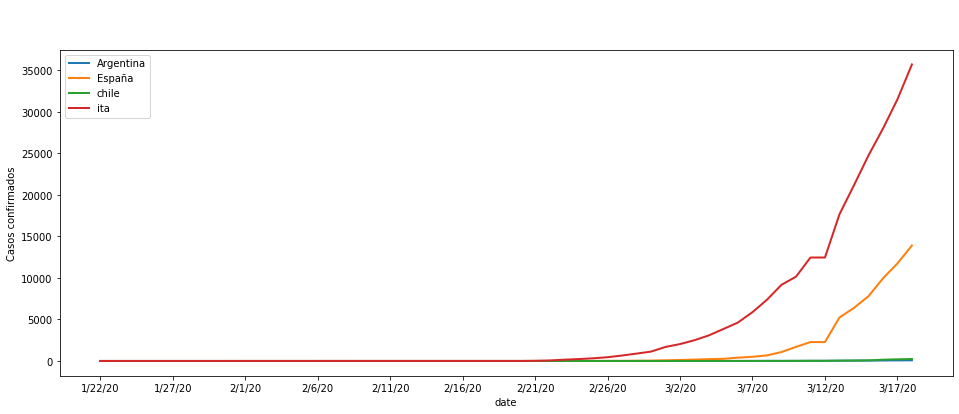

In [39]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_esp['date'], y=covid_esp['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_chile['date'], y=covid_chile['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_ita['date'], y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [96]:
t = []
d0 = datetime.datetime.strptime("1/1/20", '%m/%d/%y')
for d in covid_ita['date']:
    elapsed_days = (datetime.datetime.strptime(d, '%m/%d/%y') - d0).days
    t.append(elapsed_days)

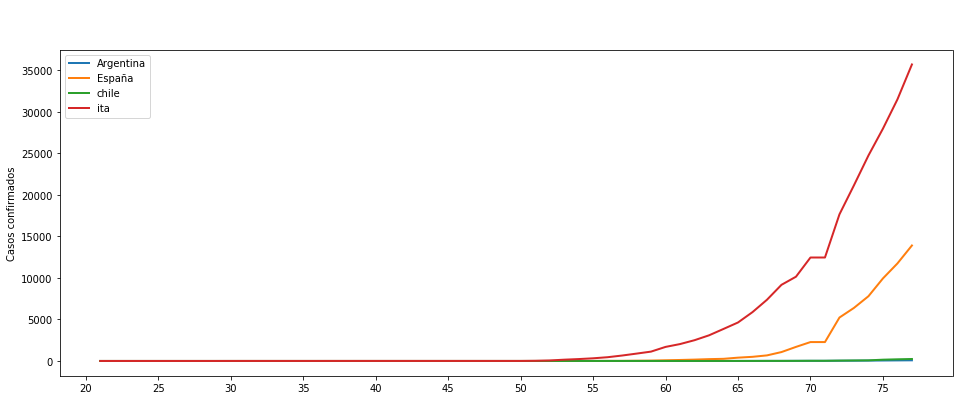

In [98]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [305]:
z = covid_arg['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_arg = t #- patient_zero

z = covid_ita['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_ita = t #- patient_zero

z = covid_chile['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_chile = t #- patient_zero

z = covid_esp['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_esp = t #- patient_zero

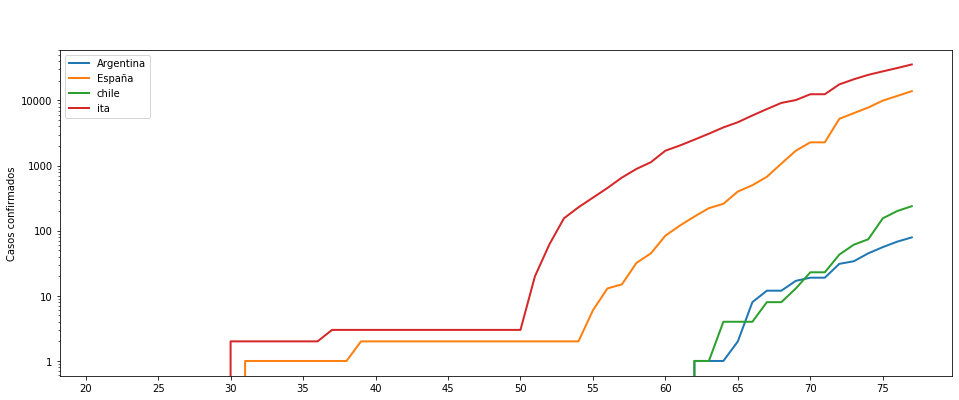

In [306]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t_arg, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_esp, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_chile, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_ita, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [307]:
df_world = pd.read_csv('../dat/pop_area.csv')

In [308]:
df_world

,Unnamed: 0,country,population,area
0,0,China,1433783686,9596961
1,1,India,1366417754,3287263
2,2,United States,329064917,9525067
3,3,Indonesia,270625568,1910931
4,4,Pakistan,216565318,907132
...,...,...,...,...
180,180,Marshall Islands,58791,181
181,181,Saint Kitts and Nevis,52823,261
182,182,Liechtenstein,38019,160
183,183,San Marino,33860,61


In [309]:
pais = 'Spain'
popu_esp = df_world[df_world['country'] == pais]['population'].values[0]
area_esp = df_world[df_world['country'] == pais]['area'].values[0]

pais = 'Chile'
popu_chile = df_world[df_world['country'] == pais]['population'].values[0]
area_chile = df_world[df_world['country'] == pais]['area'].values[0]

pais = 'Argentina'
popu_arg = df_world[df_world['country'] == pais]['population'].values[0]
area_arg = df_world[df_world['country'] == pais]['area'].values[0]

pais = 'Italy'
popu_ita = df_world[df_world['country'] == pais]['population'].values[0]
area_ita = df_world[df_world['country'] == pais]['area'].values[0]

In [312]:
y_arg = covid_arg['confirmed'] / popu_arg * 1.e6
y_chile = covid_chile['confirmed'] / popu_chile * 1.e6

y_esp = covid_esp['confirmed'] / popu_esp * 1.e6
y_ita = covid_ita['confirmed'] / popu_ita * 1.e6

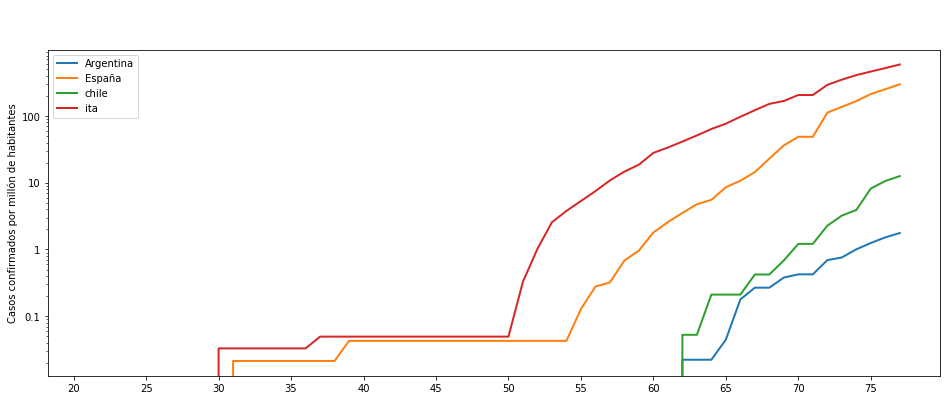

In [314]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
sns.lineplot(x=t_arg, y=y_arg, sort=False, linewidth=2)
sns.lineplot(x=t_esp, y=y_esp, sort=False, linewidth=2)
sns.lineplot(x=t_chile, y=y_chile, sort=False, linewidth=2)
sns.lineplot(x=t_ita, y=y_ita, sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados por millón de habitantes')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()